In [1]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import math
import random

In [4]:

# Ruta al archivo Excel
ruta_archivo = "../datos-estadistica/datos.xlsx"

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo)



In [17]:
import pandas as pd

# Función para calcular la media manualmente
def calcular_media(lista):
    lista = [x for x in lista if pd.notna(x)]  # Filtrar NaN
    return sum(lista) / len(lista)

# Función para calcular la mediana manualmente
def calcular_mediana(lista):
    lista = sorted([x for x in lista if pd.notna(x)])  # Filtrar NaN y ordenar
    n = len(lista)
    mitad = n // 2
    if n % 2 == 0:
        return (lista[mitad - 1] + lista[mitad]) / 2
    else:
        return lista[mitad]

# Función para calcular la desviación estándar poblacional manualmente
def calcular_desviacion_estandar(lista):
    lista = [x for x in lista if pd.notna(x)]  # Filtrar NaN
    media = calcular_media(lista)
    varianza = sum((x - media) ** 2 for x in lista) / len(lista)
    return varianza ** 0.5

# Seleccionar y organizar las columnas en el orden deseado
columnas = df[['GDP (USD Billion)', 'Population (Millions)', 'Unemployment Rate (%)', 'Average Age','Women (%)','Men (%)','Budget (USD Billion)']]

# Convertir columnas a numérico (si hay strings, se convertirán a NaN)
columnas = columnas.apply(pd.to_numeric, errors='coerce')

# Nombres de las columnas
columnas_nombres = ['GDP (USD Billion)', 'Population (Millions)', 'Unemployment Rate (%)', 'Average Age', 'Women (%)', 'Men (%)', 'Budget (USD Billion)']

for i, columna in enumerate(columnas.columns):
    datos_columna = columnas[columna].dropna().tolist()  # Convertir la columna a lista y filtrar NaN
    media = calcular_media(datos_columna)
    mediana = calcular_mediana(datos_columna)
    desviacion_estandar = calcular_desviacion_estandar(datos_columna)

    print(f"\n{columnas_nombres[i]}:")
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    print(f"Desviación Estándar Poblacional: {desviacion_estandar}")



GDP (USD Billion):
Media: 8.75
Mediana: 2.65
Desviación Estándar Poblacional: 19.579713140561246

Population (Millions):
Media: 0.7309999999999999
Mediana: 0.39
Desviación Estándar Poblacional: 1.3300936057285593

Unemployment Rate (%):
Media: 13.833333333333334
Mediana: 13.45
Desviación Estándar Poblacional: 2.8955521446215093

Average Age:
Media: 29.433333333333334
Mediana: 29.0
Desviación Estándar Poblacional: 1.9093337988826249

Women (%):
Media: 51.5
Mediana: 51.0
Desviación Estándar Poblacional: 0.7637626158259734

Men (%):
Media: 48.5
Mediana: 49.0
Desviación Estándar Poblacional: 0.7637626158259734

Budget (USD Billion):
Media: 1.6499999999999997
Mediana: 0.6
Desviación Estándar Poblacional: 3.3931794333142284


In [38]:

# Función para calcular los valores del boxplot manualmente
def calculate_boxplot_values(data):
    # Asegúrate de que data no esté vacío
    if len(data) == 0:
        raise ValueError("Los datos están vacíos")
    
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    q1_pos = (n + 1) / 4
    q3_pos = 3 * (n + 1) / 4
    
    q1 = sorted_data[int(q1_pos) - 1] if q1_pos.is_integer() else np.interp(q1_pos, np.arange(n), sorted_data)
    q3 = sorted_data[int(q3_pos) - 1] if q3_pos.is_integer() else np.interp(q3_pos, np.arange(n), sorted_data)
    median = np.median(sorted_data)
    
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return q1, median, q3, lower_bound, upper_bound, outliers

# Función para graficar el boxplot
def plot_boxplot(ax, data, column_name):
    # Verificar que data no esté vacío
    if len(data) == 0:
        ax.text(0.5, 0.5, f"No hay datos para {column_name}", horizontalalignment='center', verticalalignment='center')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Boxplot Manual de {column_name}')
        return
    
    q1, median, q3, lower_bound, upper_bound, outliers = calculate_boxplot_values(data)
    
    # Dibujar caja
    box = plt.Rectangle((0.25, q1), 0.5, q3 - q1, edgecolor='black', facecolor='lightblue')
    ax.add_patch(box)
    
    # Dibujar línea de mediana
    ax.plot([0.25, 0.75], [median, median], color='red', linestyle='--')
    
    # Dibujar bigotes
    ax.plot([0.5, 0.5], [lower_bound, q1], color='black')
    ax.plot([0.5, 0.5], [q3, upper_bound], color='black')
    
    # Dibujar los outliers
    if outliers:
        ax.scatter(np.full_like(outliers, 0.5), outliers, color='red', marker='o')
    
    # Configuración del gráfico
    ax.set_xlim(0, 1)
    ax.set_ylim(min(data) - 1, max(data) + 1)
    ax.set_xticks([])
    ax.set_title(column_name)

# Ejemplo de cómo seleccionar las primeras cuatro columnas
primeras_cuatro_columnas = columnas.columns[:8]  # Selecciona las primeras cuatro columnas






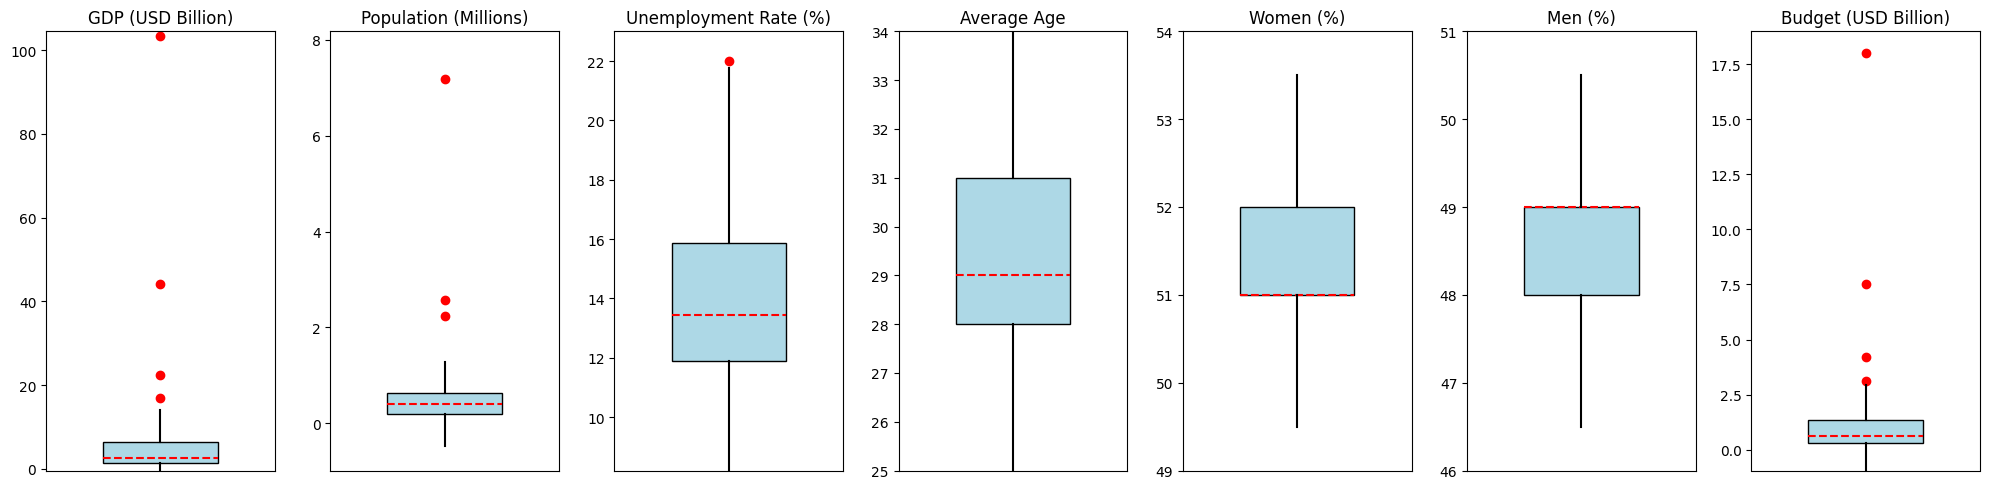

In [39]:
# Crear una figura con subgráficos
fig, axs = plt.subplots(1, len(primeras_cuatro_columnas), figsize=(20, 5))
# Graficar boxplots para las primeras cuatro columnas
for i, column in enumerate(primeras_cuatro_columnas):
    data = columnas[column].dropna().tolist()  # Convertir la columna a lista y filtrar NaN
    plot_boxplot(axs[i], data, columnas_nombres[i])

plt.tight_layout()
plt.show()

In [40]:
# calcular la covarianza
# Seleccionar las columnas necesarias
X = df['GDP (USD Billion)']
Y = df['Population (Millions)']

# Calcular las medias de X e Y
mean_X = calcular_media(X)
mean_Y = calcular_media(Y)

def restar_media(valores, media):
    return [x - media for x in valores]

dif_X = restar_media(X, mean_X)
dif_Y = restar_media(Y, mean_Y)

# Paso 3: Calcular la covarianza (sumar los productos de las diferencias y dividir por N-1)
def calcular_covarianza(dif_X, dif_Y):
    productos = [dif_X[i] * dif_Y[i] for i in range(len(dif_X))]
    return sum(productos) / (len(dif_X))

covarianza = calcular_covarianza(dif_X, dif_Y)
print(covarianza)

25.79571666666666


In [41]:
# calcular la correlacion

# Seleccionar las columnas 
X = df['GDP (USD Billion)']
Y = df['Population (Millions)']

# Calcular las medias de X e Y
mean_X = calcular_media(X)
mean_Y = calcular_media(Y)

# Paso 2: Restar la media de cada valor de X y Y (obtener diferencias respecto a la media)

def restar_media(valores, media):
    return [x - media for x in valores]

dif_X = restar_media(X, mean_X)
dif_Y = restar_media(Y, mean_Y)

covarianza_cor = calcular_covarianza(dif_X,dif_Y)

desviacion_X = calcular_desviacion_estandar(dif_X)
desviacion_Y = calcular_desviacion_estandar(dif_Y)

def calcular_correlacion(covarianza, desviacion_X, desviacion_Y):
    return covarianza / (desviacion_X * desviacion_Y)

correlacion = calcular_correlacion(covarianza, desviacion_X, desviacion_Y)

print("Coeficiente de correlación:", correlacion)

Coeficiente de correlación: 0.9905104636501415
